# Machine Learing and Data Engineering Project

In [1]:
# importing core libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Data ETL (Extract, Transform, Load)

The data being imported consists variables used to measure heart health and functionality. Consisting of 14 columns, 13 being features (predictors) and 1 being the outcome (heart disease). In this project we attempt to build a predictive model that can classify whether a patient has heart disease. The data is spread amongst 4 datasets from different regions.

In [2]:
# importing datasets
switzerland_data = pd.read_csv("processed.switzerland.data")
cleveland_data = pd.read_csv("processed.cleveland.data", encoding="latin-1")
hungary_data = pd.read_csv("processed.hungarian.data")
long_beach_data = pd.read_csv("processed.va.data")

# modifying datasets and observing rows
dataset_list = [switzerland_data,cleveland_data,hungary_data,long_beach_data]
dataset_column_names = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]
for df in dataset_list:
    df.columns = dataset_column_names
    print(df.head())
    print(df.info())
    print("\n")

   age  sex  cp trestbps  chol fbs restecg thalach exang oldpeak slope ca  \
0   34    1   4      115     0   ?       ?     154     0      .2     1  ?   
1   35    1   4        ?     0   ?       0     130     1       ?     ?  ?   
2   36    1   4      110     0   ?       0     125     1       1     2  ?   
3   38    0   4      105     0   ?       0     166     0     2.8     1  ?   
4   38    0   4      110     0   0       0     156     0       0     2  ?   

  thal  num  
0    ?    1  
1    7    3  
2    6    1  
3    ?    2  
4    3    1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       122 non-null    int64 
 1   sex       122 non-null    int64 
 2   cp        122 non-null    int64 
 3   trestbps  122 non-null    object
 4   chol      122 non-null    int64 
 5   fbs       122 non-null    object
 6   restecg   122 non-null    object
 7   t

In [3]:
# Data Cleaning/ wrangling - observing the data revealed question marks in the code (NaNs) and data with the wrong data types

# replacing "?" with np.nan values
for df in dataset_list:
    for column in dataset_column_names:
        df[column] = df[column].replace("?",np.nan)

#observing nulls
#for df in dataset_list:
 #   print(df.info())
  #  print("\n")

# Slope, Ca, and Thal have too many Nan values to be of any use and will thusly be dropped to allow the removal of all Nans for future analysis (I do not have a good understanding of heart biology however I am assuming
# the high amount of missing values for these factors is an indicator that they are not as important as the other variables and can therefore be removed with little consequence.)
drop_cols = ["slope","ca","thal"]
dataset_column_names = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","num"]
for df in dataset_list:
    df.drop(drop_cols,axis=1,inplace=True)
    
    # Dealing with nan values: (dropna)
    df.dropna(inplace=True)

# Modifying dtypes
for df in dataset_list:
    for column in dataset_column_names:
        if df[column].dtype == "object" or df[column].dtype == "int64":
            df[column] = df[column].astype("float64")
        else:
            continue

# observing nulls
for df in dataset_list:
    print(df.info())
    print("\n")

# Preperation for merging datsets
cleveland_data["origin"] = "cleveland"
switzerland_data["origin"] = "switzerland"
hungary_data["origin"] = "hungary"
long_beach_data["origin"] = "long_beach"
dataset_column_names = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","num","origin"]

# merging datasets
df1 = pd.merge(left=cleveland_data,right=switzerland_data,on = dataset_column_names,how="outer")
df2 = pd.merge(left=df1,right=hungary_data,on = dataset_column_names,how="outer")
df3 = pd.merge(left=df2,right=long_beach_data,on = dataset_column_names,how="outer")
print("\n")
print("Main df:")
print(df3.head())
print(df3.info())

# for simplicity
df = df3

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 4 to 120
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       46 non-null     float64
 1   sex       46 non-null     float64
 2   cp        46 non-null     float64
 3   trestbps  46 non-null     float64
 4   chol      46 non-null     float64
 5   fbs       46 non-null     float64
 6   restecg   46 non-null     float64
 7   thalach   46 non-null     float64
 8   exang     46 non-null     float64
 9   oldpeak   46 non-null     float64
 10  num       46 non-null     float64
dtypes: float64(11)
memory usage: 4.3 KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   ch

In [4]:
# Data Cleaning/ wrangling (continued)

# Turning numerical categoricals to object categoricals (primarily for exploratory analysis)
# sex -> male / female
df.sex = np.where(df.sex == 1,"male","female")

# cp -> 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
cp_map = {1:"typical_angina",2:"atypical_angina",3:"non_anginal_pain",4:"asymptomatic"}
df.cp = df.cp.map(cp_map)

# fbs -> (fasting blood sugar > 120 mg/dl) 1 = True, 2 = False
fbs_map = {0: "yes",1:"no"}

df.fbs = df.fbs.map(fbs_map)

# restecg -> (resting electrocardiographic results) 0: normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
restecg_map = {
    0: "normal",
    1: "abnormality",
    2: "definite_left_ventrical_hypertrophy"}

df["restecg"] = df["restecg"].map(restecg_map)
        
# exang -> (exercise induced angina) 1 = True, 2 = False
exang_map = {0:"yes",1:"no"}
df.exang = df.exang.map(exang_map)

print(df.head())
print(df.fbs.value_counts())
print(df.exang.value_counts())

    age     sex               cp  trestbps   chol  fbs  \
0  29.0    male  atypical_angina     120.0  243.0  yes   
1  29.0    male  atypical_angina     130.0  204.0  yes   
2  30.0  female   typical_angina     170.0  237.0  yes   
3  31.0  female  atypical_angina     100.0  219.0  yes   
4  31.0    male     asymptomatic     120.0  270.0  yes   

                               restecg  thalach exang  oldpeak  num     origin  
0                               normal    160.0   yes      0.0  0.0    hungary  
1  definite_left_ventrical_hypertrophy    202.0   yes      0.0  0.0  cleveland  
2                          abnormality    170.0   yes      0.0  0.0    hungary  
3                          abnormality    150.0   yes      0.0  0.0    hungary  
4                               normal    153.0    no      1.5  1.0    hungary  
fbs
yes    627
no     110
Name: count, dtype: int64
exang
yes    442
no     295
Name: count, dtype: int64


## Exploratory analysis

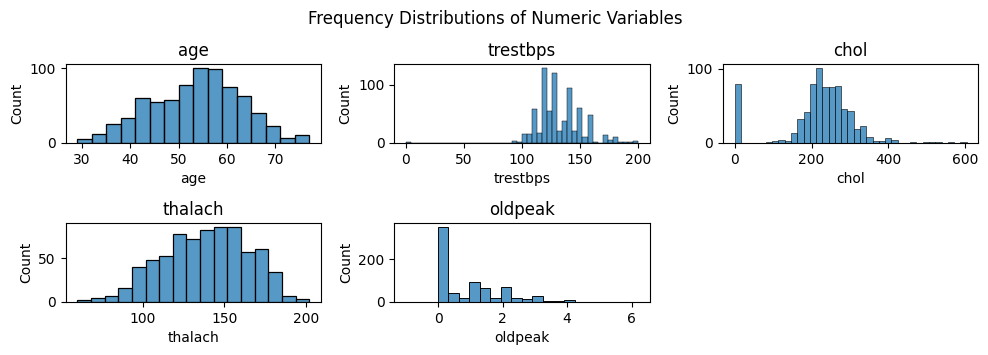

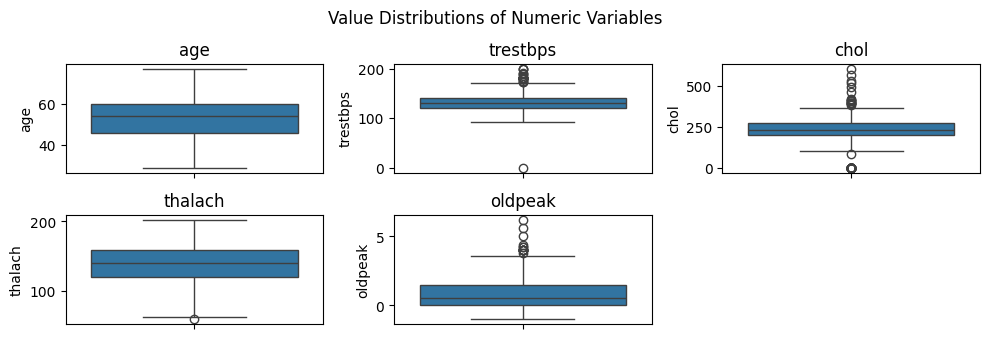

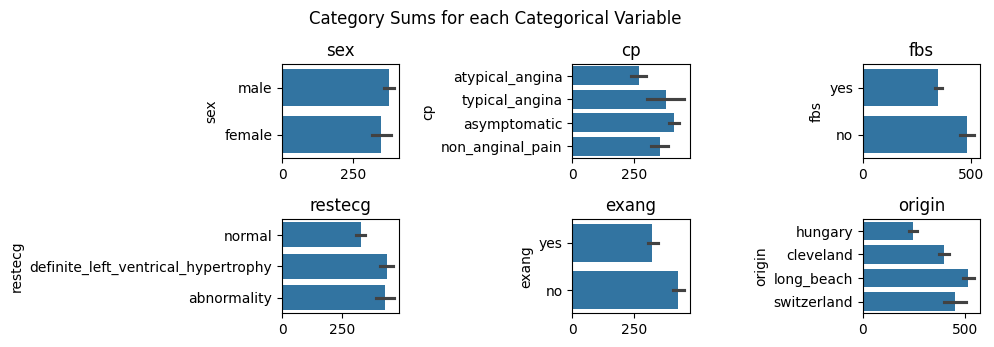

In [28]:
# we will now perform exploratory analysis on the data to ensure they follow normal trends, have no outlier, and are uncorrelated (to avoid multicolinearity)

# numeric data
plt.figure(figsize=(10,8))
subplot_index = 1
for col in ["age","trestbps","chol","thalach","oldpeak"]:
    x = df[col]
    plt.subplot(5,3,subplot_index)
    sns.histplot(x)
    plt.title(col)
    subplot_index += 1

plt.suptitle("Frequency Distributions of Numeric Variables")
plt.tight_layout()
plt.show()
plt.close()

# barplots for numeric data
plt.figure(figsize=(10,8))
subplot_index = 1
for col in ["age","trestbps","chol","thalach","oldpeak"]:
    x = df[col]
    plt.subplot(5,3,subplot_index)
    sns.boxplot(x)
    plt.title(col)
    subplot_index += 1

plt.suptitle("Value Distributions of Numeric Variables")
plt.tight_layout()
plt.show()
plt.close()

# categorical data
#encoded_cat_cols
plt.figure(figsize=(10,8))
subplot_index = 1
for col in ["sex", "cp", "fbs","restecg","exang","origin"]:
    plt.subplot(5,3,subplot_index)
    sns.barplot(df[col])
    plt.title(col)
    subplot_index +=1

plt.suptitle("Category Sums for each Categorical Variable")
plt.tight_layout()
plt.show()

The numerical data does not deviate too far from normal distribution where non-parametric classifiers will experience severe bias, similarily the categorical values see fair amount of eveness being suitable for classifiers in the future. 

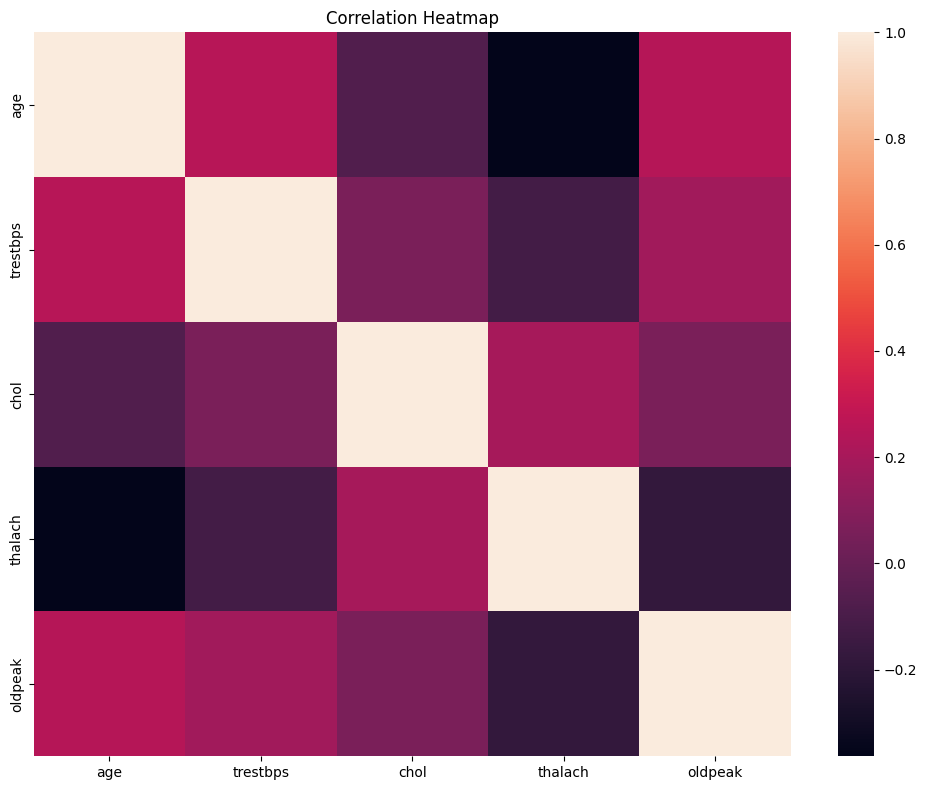

In [6]:
# testing for multicolinearity (numerical variables only)
plt.figure(figsize=(10,8))
sns.heatmap(df[["age","trestbps","chol","thalach","oldpeak"]].corr())
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

The heatmap shows there is some multicolinearity but this is almost unavoidable as they all relate to heart health. These levels of correlation should be acceptable for future use in classifiers.

## Feature Engineering

In [7]:
# since we intend to put the data through a series of classifiers, it would be beneficial to engineer the features so that the data is optimally prepared for machine learning classifiers.

# will divide the datset into a category dataset and a numerical dataset
num_cols = df[["age","trestbps","chol","thalach","oldpeak"]]
cat_cols = df[["sex", "cp", "fbs","restecg","exang"]] # dropped "origin" to test whether it reduces classifier accuracy.
y = df["num"] # target variable 

# standardising the num_cols
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(num_cols)
standardised_num_cols = scaler.transform(num_cols)

# one hot encoding cat_cols
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoder.fit(cat_cols)
encoded_cat_cols = encoder.transform(cat_cols)
encoded_cat_col_names = encoder.get_feature_names_out(cat_cols.columns)

# reforming the data into dataframes
standardised_num_cols = pd.DataFrame(standardised_num_cols)
standardised_num_cols.columns = ["age","trestbps","chol","thalach","oldpeak"]

encoded_cat_cols = pd.DataFrame(encoded_cat_cols)
encoded_cat_cols.columns =  encoded_cat_col_names

main_df = pd.concat([standardised_num_cols,encoded_cat_cols],axis=1)
print(main_df.head())

# Since the dataset is rather small, no feature reducing methods will need to be implimented.

        age  trestbps      chol   thalach   oldpeak  sex_female  sex_male  \
0 -2.574932 -0.684526  0.243566  0.825381 -0.821651         0.0       1.0   
1 -2.574932 -0.146856 -0.172778  2.453110 -0.821651         0.0       1.0   
2 -2.468108  2.003824  0.179513  1.212935 -0.821651         1.0       0.0   
3 -2.361285 -1.759866 -0.012645  0.437826 -0.821651         1.0       0.0   
4 -2.361285 -0.684526  0.531804  0.554093  0.561952         0.0       1.0   

   cp_asymptomatic  cp_atypical_angina  cp_non_anginal_pain  \
0              0.0                 1.0                  0.0   
1              0.0                 1.0                  0.0   
2              0.0                 0.0                  0.0   
3              0.0                 1.0                  0.0   
4              1.0                 0.0                  0.0   

   cp_typical_angina  fbs_no  fbs_yes  restecg_abnormality  \
0                0.0     0.0      1.0                  0.0   
1                0.0     0.0      

## Secondary Exploratory Analysis - Correlations including encoded categorical values

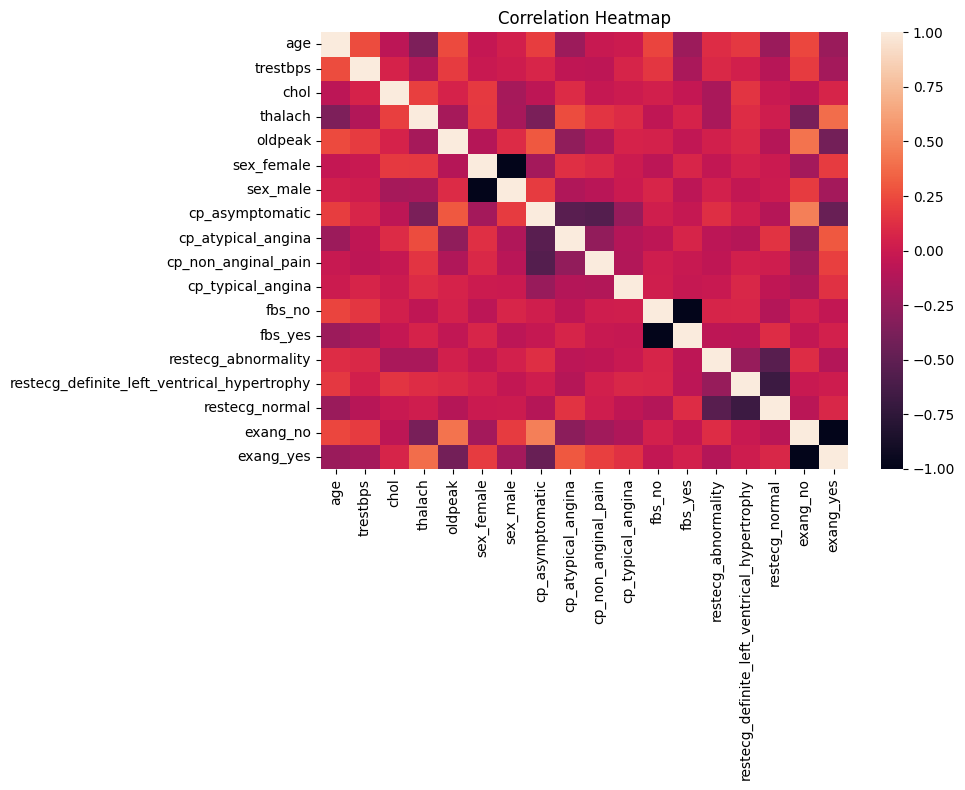

In [8]:
# corr heatmap
plt.figure(figsize=(10,8))
sns.heatmap(main_df.corr())
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

As with the previous heatmap we do se some areas of mid to high correlation which, again, may be unavoidable due to the close relationships these values have with overall heart health

## Building Classifiers and Hyperparamter Tuning

All the classifiers will also recieve hyperparameter tuning.

In [9]:
# setting up predictors (x) and outcome (y)
x = main_df
y = y # binary classifer 0 = <50% narrowing of arteries, 1 = >50% narrowing of arteries

In [10]:
# splitting the data into training and test sets
from sklearn.model_selection import train_test_split
xtrain, xtest ,ytrain ,ytest = train_test_split(x,y)

In [11]:
# Classifier 1: logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {"penalty":["l2", None], "fit_intercept": [True,False], "C": [0.1,0.5,0.8,1,1.5,2,5,8,10]}
log_r_optimiser = GridSearchCV(LogisticRegression(max_iter=200, solver = "lbfgs"),param_grid=param_grid)
log_r_optimiser.fit(x,y)

C:\Users\scada\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\scada\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\scada\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\scada\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\scada\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\scada\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=No

GridSearchCV(estimator=LogisticRegression(max_iter=200),
             param_grid={'C': [0.1, 0.5, 0.8, 1, 1.5, 2, 5, 8, 10],
                         'fit_intercept': [True, False],
                         'penalty': ['l2', None]})

In [12]:
# Classifer 2: K Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
param_grid = {"n_neighbors": list(range(1, 30,1)), "weights":["uniform","distance"]}
knn_optimiser = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid)
knn_optimiser.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']})

In [13]:
# classifier 3: DecisionTree

from sklearn.tree import DecisionTreeClassifier
param_grid = {"max_depth": list(range(1,20,1)), "ccp_alpha": np.array(list(range(0,50,1)))/10}
dt_optimiser = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid)
dt_optimiser.fit(x,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19]})

In [14]:
# Classifier 4: Random Forest
from sklearn.ensemble import RandomForestClassifier
param_grid = {"max_depth": list(range(1,20,1)), "ccp_alpha": np.array(list(range(0,50)))/10}
rf_optimiser = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid)
rf_optimiser.fit(x,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19]})

In [15]:
# Classifier 5: SVM

from sklearn.svm import SVC
param_grid = {"C": np.array(list(range(0,50,1)))/100,"kernel": ["linear","poly","rbf"]}
svc_optimiser = GridSearchCV(SVC(), param_grid=param_grid)
svc_optimiser.fit(x,y)

C:\Users\scada\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\scada\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\scada\miniconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\scada\miniconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\scada\miniconda3\Lib\site-pac

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49]),
                         'kernel': ['linear', 'poly', 'rbf']})

## Classifiers Results and Evaluation

In [26]:
# method to analyse classifer performance

def GridSearchCV_analyser(GSC_object, classifier_name):
    best_score = GSC_object.best_score_
    scores = pd.DataFrame(GSC_object.cv_results_).mean_test_score
    best_params = GSC_object.best_params_

    plot_title = f"{classifier_name}\nBest_Score: {best_score}\nBest_Params: {best_params}"
    plt.plot(scores)
    plt.title(plot_title)
    plt.ylabel("Accuracy Score")
    #plt.show()

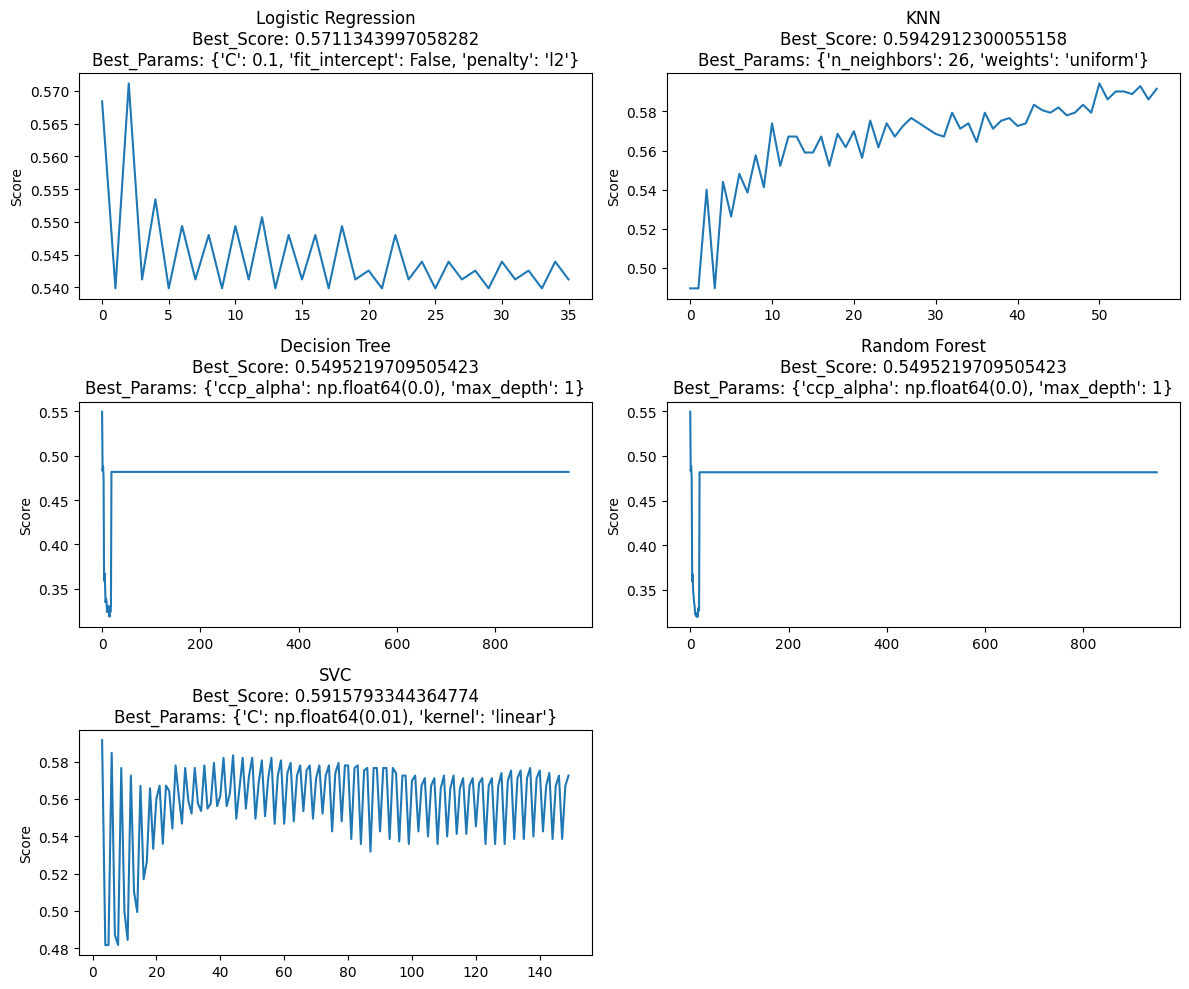

In [24]:
# presenting classifier results

plt.figure(figsize=(12,10))
# logistic regression
plt.subplot(3,2,1)
GridSearchCV_analyser(log_r_optimiser, "Logistic Regression")

# KNN
plt.subplot(3,2,2)
GridSearchCV_analyser(knn_optimiser, "KNN")

# Decision Tree
plt.subplot(3,2,3)
GridSearchCV_analyser(dt_optimiser, "Decision Tree")

# Random Forest
plt.subplot(3,2,4)
GridSearchCV_analyser(rf_optimiser, "Random Forest")

# SVC
plt.subplot(3,2,5)
GridSearchCV_analyser(svc_optimiser, "SVC")

plt.tight_layout()
plt.show()


From the models run we can see that the KNN classifying alogorithim had the best score (0.594) and is therefore the best classifier to use for this dataset (with parameters n_neighbors: 26, weights: "uniform"). In terms of classifier strength this is relativly poor and is clearly missing additional key predictors such as those removed in the cleaning process (unable to use those predictors due to significant NaN counts).

## Developing the Pipeline

We can simplify the processes of feature engineering and classifying using pipelines to make the process significantly easier.

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [19]:
# developing the pipline - final_pipeline = classifier_pipeline

# pipelining the seperate data transforming approaches
num_pipeline = Pipeline([("scaler", StandardScaler())])
cat_pipeline = Pipeline([("encoder", OneHotEncoder(sparse_output=False))])

# merging the seperate pipelines into one
combined_pipeline = ColumnTransformer([("num_pipeline", num_pipeline, ["age","trestbps","chol","thalach","oldpeak"]),("cat_pipeline", cat_pipeline, encoded_cat_col_names)])

# adding the classifier to the pipeline
classifier_pipeline = Pipeline([("combined_pipeline",combined_pipeline),("KNN", KNeighborsClassifier(n_neighbors=26,weights="uniform"))])

In [25]:
# testing the pipeline
classifier_pipeline.fit(xtrain,ytrain)
ypred = classifier_pipeline.predict(xtest)
pipeline_score = classifier_pipeline.score(xtest,ytest)

print(f"The pipeline KNN accuracy score is: {pipeline_score}")

The pipeline KNN accuracy score is: 0.6054054054054054
